Radian Chord Intersection Tool

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#Function to retrieve user input for chords 
def Retrieve_Chord_Info():
    
    print("Welcome to my Radian Chord Intersection Tool!")
    print("This will calculate and display the number of intersections between user specified chords in a circle.")
    
    #To get the amount of chords from the user with the loop to streamline error handling
    while True:
        try:
            Amount = int(input("Enter the number of chords you would like in the circle as an integer."))
            if Amount < 1:
                raise ValueError
            else:
                break
        except ValueError:
            print("Error, please enter at least 1 chord as an integer. Try again.")
            
    #Following code retrieves the s_x and e_x points for each of the chords they specified above while handling errors.
    Chords_Dict = {}
    for i in range(Amount):
        while True:
            try:
                Points = []
                s_x = float(input(f"Enter the radian measure for the start of chord {i + 1} as a decimal."))
                if 0 <= s_x <= 2*np.pi:
                    Points.append(s_x)
                    break
                else:
                    raise ValueError
            except ValueError:
                print("Error, Please ensure you enter values in the range of 0 to 2pi as a decimal.")
        while True:
            try:
                e_x = float(input(f"Enter the radian measure for the end of chord {i + 1} as a decimal. This value must be greater than the start."))
                if e_x <= s_x:
                    raise ValueError
                elif 0 <= e_x <= 2*np.pi:
                    Points.append(e_x)
                    break
                else:
                    raise ValueError
            except ValueError:
                print("Error, Please ensure you enter values in the range of 0 to 2pi as a decimal greater than the start.")
        Chords_Dict[f'Chord {i+1}'] = Points
        
    #Return the dictionary which has key-value associations for each chord to its respective s_x and e_x
    return Chords_Dict

#Function to draw the circle and chords
def Create_Circle(Chords_Dict):    
    #Below generates the radian values for the circle and retrieves their cartesian values for plotting
    #Unit circle so the center is at (0,0) with a radius of 1
    theta = np.linspace(0, 2*np.pi)
    x = np.cos(theta)
    y = np.sin(theta)
    
    #Plot the circle while marking 0 and pi with an X
    plt.plot(x, y, label='Circle')
    zero_loc = 0
    plt.scatter(np.cos(zero_loc), np.sin(zero_loc), color='red', marker = 'x', label='0')
    pi_loc = np.pi
    plt.scatter(np.cos(pi_loc), np.sin(pi_loc), color='blue', marker = 'x', label='pi')
    
    #This goes through the chord dict and converts the radian s_x and e_x to cartesian while plotting each chord
    #Also acquires the slope and y-intercept for each chord so a linear equation can be derived. Saved in a dict
    Chord_Formulas = {}
    for i in Chords_Dict:
        Val_1, Val_2 = Chords_Dict[i]
        x1 = np.cos(Val_1)
        y1 = np.sin(Val_1)
        x2 = np.cos(Val_2)
        y2 = np.sin(Val_2)
        Chord_Slope = (y2 - y1) / (x2 - x1)
        Intercept = y1 - Chord_Slope * x1
        Chord_Formulas[i] = Chord_Slope, Intercept
        Chord_Vals_X = [x1, x2]
        Chord_Vals_Y = [y1, y2]
        plt.plot(Chord_Vals_X, Chord_Vals_Y, marker='o', label = i)
    
    #Refine the visualize the plot
    plt.axis('equal')
    plt.axis('off')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.grid(True)
    plt.show()
    
    #Return the dictionary with the slope and intercept for each chord
    return Chord_Formulas

#Function to compute the intersections 
def Calculate_Intersections(Chord_Formulas):
    
    #Prepare the slopes and intercepts into lists
    Slopes = []
    Intercepts = []
    for i in Chord_Formulas:
        m, b = Chord_Formulas[i]
        Slopes.append(-m)
        Intercepts.append(b)
        
    #Nested loop that iterates through Slopes and intercepts to solve system of equations for each possible combination of chords 
    #Includes measures to prevent self and redundant checks while ensuring valid intersections are  within the circle, one radius from the center. 
    count = 0
    already_done_s = []
    already_done_c = []
    for s, c, i in zip(Slopes, Intercepts, Chord_Formulas):
        already_done_s.append(s)
        already_done_c.append(c)
        for s_test, c_test, index in zip(Slopes, Intercepts, Chord_Formulas):
            if s == s_test:
                continue 
            elif c == c_test:
                continue 
            elif s_test in already_done_s:
                continue
            elif c_test in already_done_c:
                continue
            else:
                S_Pair = [[s, 1], [s_test, 1]]
                S_Pair = np.array(S_Pair)
                C_Pair = [c, c_test]
                C_Pair = np.array(C_Pair)
                try:
                    Intersection = np.linalg.solve(S_Pair, C_Pair)
                    Intersection_X = Intersection[0]
                    Intersection_Y = Intersection[1]
                    Check_Distance = np.sqrt(((Intersection_X-0)**2)+((Intersection_Y-0)**2))
                    if Check_Distance <= 1:
                        print(f"{i} and {index} intersect at : ({Intersection_X}, {Intersection_Y})")
                        count = count + 1
                    else:
                        continue
                except np.linalg.LinAlgError:
                    print(f"There is no intersection in the circle between {i} and {index}")
    print(f'Total intersections within the circle: {count}')

The example below shows 12 chords and 34 total instersections in the circle

Welcome to my Radian Chord Intersection Tool!
This will calculate and display the number of intersections between user specified chords in a circle.
Enter the number of chords you would like in the circle as an integer.12
Enter the radian measure for the start of chord 1 as a decimal..5
Enter the radian measure for the end of chord 1 as a decimal. This value must be greater than the start.6.2
Enter the radian measure for the start of chord 2 as a decimal..7
Enter the radian measure for the end of chord 2 as a decimal. This value must be greater than the start.5.5
Enter the radian measure for the start of chord 3 as a decimal.4.2
Enter the radian measure for the end of chord 3 as a decimal. This value must be greater than the start.6.1
Enter the radian measure for the start of chord 4 as a decimal..5
Enter the radian measure for the end of chord 4 as a decimal. This value must be greater than the start.3.5
Enter the radian measure for the start of chord 5 as a decimal.2.7
Enter the radi

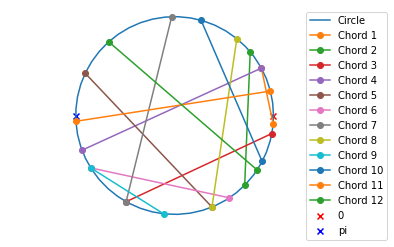

Chord 1 and Chord 4 intersect at : (0.8775825618903728, 0.479425538604203)
Chord 1 and Chord 11 intersect at : (0.9279950432394023, 0.24104385729295633)
Chord 2 and Chord 3 intersect at : (0.725430651258249, -0.3027958682402239)
Chord 2 and Chord 4 intersect at : (0.7556619682277751, 0.4236276578824244)
Chord 2 and Chord 10 intersect at : (0.7333326735946688, -0.11291942538104233)
Chord 2 and Chord 11 intersect at : (0.746891922154625, 0.21289361016833516)
Chord 2 and Chord 12 intersect at : (0.7192639962255698, -0.4509734450800409)
Chord 3 and Chord 5 intersect at : (0.0757129004568642, -0.6067762846286978)
Chord 3 and Chord 6 intersect at : (-0.10317640438523361, -0.6904723900625924)
Chord 3 and Chord 7 intersect at : (-0.4902608213406995, -0.8715757724135882)
Chord 3 and Chord 8 intersect at : (0.451010328783231, -0.431187625720336)
Chord 3 and Chord 9 intersect at : (-0.3844464523211202, -0.822068896674421)
Chord 3 and Chord 10 intersect at : (0.8003343455653489, -0.267751025835313

In [6]:
#Executes the functions in a manner that passes the return of the previous as a paramter into the next
Chords_Dict = Retrieve_Chord_Info()
Chord_Formulas = Create_Circle(Chords_Dict)
Calculate_Intersections(Chord_Formulas)

An example with less chords is shown below

Enter the number of chords you would like in the circle as an integer.4
Enter the radian measure for the start of chord 1 as a decimal.1.6
Enter the radian measure for the end of chord 1 as a decimal. This value must be greater than the start.4.7
Enter the radian measure for the start of chord 2 as a decimal.2
Enter the radian measure for the end of chord 2 as a decimal. This value must be greater than the start.5
Enter the radian measure for the start of chord 3 as a decimal.1.3
Enter the radian measure for the end of chord 3 as a decimal. This value must be greater than the start.4.2
Enter the radian measure for the start of chord 4 as a decimal..5
Enter the radian measure for the end of chord 4 as a decimal. This value must be greater than the start.5.3


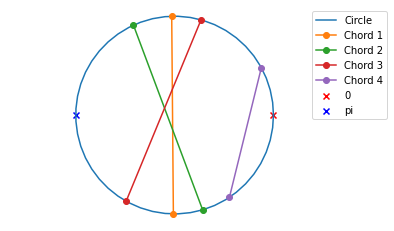

Chord 1 and Chord 2 intersect at : (-0.019538683298255737, -0.14949423716060456)
Chord 1 and Chord 3 intersect at : (-0.022982151139378397, 0.26007455430377896)
Chord 2 and Chord 3 intersect at : (-0.10161978016824162, 0.0696308121478362)
Total intersections within the circle: 3


In [7]:
Chords_Dict = Retrieve_Chord_Info()
Chord_Formulas = Create_Circle(Chords_Dict)
Calculate_Intersections(Chord_Formulas)